# Model Conditional Slope - Parametric Modulation Analysis
## Useful if you are anticipating that the amplitude of the response may be different for each stimulus dimension or will change over time
### PMOD -  Modulated regressor
### EVENT - Event regressor

In [1]:
from glob import glob
from scipy import stats
from math import sqrt
import nibabel as nb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_palette('muted')

sids = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006',
        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012',
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']
proj_dir = '/home/data/madlab/data/mri/wmaze' 
mask_filenames = []
cope_files = []
for SID in sids:
    mask_filenames_glob = glob(proj_dir + '/roi_analysis/MRthesis/fb4c_2/mask/anat_masks/_subject_id_' 
                               + SID + '/_anatmask_xfm*/*')
    mask_filenames.append(mask_filenames_glob)
    subjcopes_glob = glob(proj_dir + '/scndlvl/wmaze_MRthesis/fixed_before_conditional/model_cond_PMA-slope/' 
                          + SID + '/fixedfx/cope_PMA*')
    subjcopes_glob.sort()
    cope_files.append(subjcopes_glob)    
    if len(cope_files[-1]) == 0:
        print(SID)

## Cell to double-check the array indexing

In [2]:
'''
print '## left hippocampus:', mask_filenames[0][0]
print '## left caudate:', mask_filenames[0][1]
print '## right caudate:', mask_filenames[0][2]
print '## left dmPFC:', mask_filenames[0][3]
print '## right hippocampus:', mask_filenames[0][4]
print '## right dmPFC:', mask_filenames[0][5]
print '## left putamen', mask_filenames[0][6]
print '## right_putamen', mask_filenames[0][7]
'''

print '-----'
print '## EVENT #1:', cope_files[0][0]
print '## PMOD #2:', cope_files[0][1]

-----
## EVENT #1: /home/data/madlab/data/mri/wmaze/scndlvl/wmaze_MRthesis/fixed_before_conditional/model_cond_PMA-slope/WMAZE_001/fixedfx/cope_PMA_event.nii.gz
## PMOD #2: /home/data/madlab/data/mri/wmaze/scndlvl/wmaze_MRthesis/fixed_before_conditional/model_cond_PMA-slope/WMAZE_001/fixedfx/cope_PMA_pmod.nii.gz


### Use binarized mask to obtain activation in left & right hemisphere for each region of interest

In [3]:
all_data = {'subjid':[],
            #HPC
            'lhhp_event':[], 'rhhp_event':[], 
            'lhhp_pmod':[], 'rhhp_pmod':[],
            #Caudate
            'lhcaud_event':[], 'rhcaud_event':[], 
            'lhcaud_pmod':[], 'rhcaud_pmod':[],
            #Putamen
            'lhput_event':[], 'rhput_event':[], 
            'lhput_pmod':[], 'rhput_pmod':[]}
for i in range(len(sids)):
    all_data['subjid'].append(sids[i])
    lh_hp_img = nb.load(mask_filenames[i][0])
    rh_hp_img = nb.load(mask_filenames[i][4])
    lh_caud_img = nb.load(mask_filenames[i][1])
    rh_caud_img = nb.load(mask_filenames[i][2])
    lh_put_img = nb.load(mask_filenames[i][6])
    rh_put_img = nb.load(mask_filenames[i][7])    
    event_img = nb.load(cope_files[i][0])
    pmod_img = nb.load(cope_files[i][1])    
    ########################
    ### Left Hippocampus ###
    ########################    
    # event
    lh_hp_event_data = event_img.get_data()[lh_hp_img.get_data() > 0.]
    all_data['lhhp_event'].append(np.mean(lh_hp_event_data))    
    # pmod
    lh_hp_pmod_data = pmod_img.get_data()[lh_hp_img.get_data() > 0.]
    all_data['lhhp_pmod'].append(np.mean(lh_hp_pmod_data))    
    #########################
    ### Right Hippocampus ###
    #########################    
    # event
    rh_hp_event_data = event_img.get_data()[rh_hp_img.get_data() > 0.]
    all_data['rhhp_event'].append(np.mean(rh_hp_event_data))    
    # pmod
    rh_hp_pmod_data = pmod_img.get_data()[rh_hp_img.get_data() > 0.]
    all_data['rhhp_pmod'].append(np.mean(rh_hp_pmod_data))  
    ####################
    ### Left Caudate ###
    ####################    
    # event
    lh_caud_event_data = event_img.get_data()[lh_caud_img.get_data() > 0.]
    all_data['lhcaud_event'].append(np.mean(lh_caud_event_data))    
    # pmod
    lh_caud_pmod_data = pmod_img.get_data()[lh_caud_img.get_data() > 0.]
    all_data['lhcaud_pmod'].append(np.mean(lh_caud_pmod_data))    
    #####################
    ### Right Caudate ###
    #####################     
    # event
    rh_caud_event_data = event_img.get_data()[rh_caud_img.get_data() > 0.]
    all_data['rhcaud_event'].append(np.mean(rh_caud_event_data))    
    # pmod
    rh_caud_pmod_data = pmod_img.get_data()[rh_caud_img.get_data() > 0.]
    all_data['rhcaud_pmod'].append(np.mean(rh_caud_pmod_data))    
    ####################
    ### Left Putamen ###
    ####################    
    # event
    lh_put_event_data = event_img.get_data()[lh_put_img.get_data() > 0.]
    all_data['lhput_event'].append(np.mean(lh_put_event_data))    
    # pmod
    lh_put_pmod_data = pmod_img.get_data()[lh_put_img.get_data() > 0.]
    all_data['lhput_pmod'].append(np.mean(lh_put_pmod_data))    
    #####################
    ### Right Putamen ###
    #####################    
    # event
    rh_put_event_data = event_img.get_data()[rh_put_img.get_data() > 0.]
    all_data['rhput_event'].append(np.mean(rh_put_event_data))    
    # pmod
    rh_put_pmod_data = pmod_img.get_data()[rh_put_img.get_data() > 0.]
    all_data['rhput_pmod'].append(np.mean(rh_put_pmod_data))    
all_data_df = pd.DataFrame(all_data)

### Combine the two hemispheres to create one regional average

In [4]:
all_data_df['hp_all_event'] = (all_data_df['lhhp_event'] + all_data_df['rhhp_event'])/2.
all_data_df['hp_all_pmod'] = (all_data_df['lhhp_pmod'] + all_data_df['rhhp_pmod'])/2.
all_data_df['caud_all_event'] = (all_data_df['lhcaud_event'] + all_data_df['rhcaud_event'])/2.
all_data_df['caud_all_pmod'] = (all_data_df['lhcaud_pmod'] + all_data_df['rhcaud_pmod'])/2.
all_data_df['put_all_event'] = (all_data_df['lhput_event'] + all_data_df['rhput_event'])/2.
all_data_df['put_all_pmod'] = (all_data_df['lhput_pmod'] + all_data_df['rhput_pmod'])/2.

In [5]:
hpc_chart = {}
hpc_chart['1_HPC-event'] = all_data_df['hp_all_event'] 
hpc_chart['2_HPC-pmod'] = all_data_df['hp_all_pmod'] 
hpc_chart_df = pd.DataFrame.from_dict(hpc_chart)

In [6]:
hpc_chart_df

,1_HPC-event,2_HPC-pmod
0,-0.523378,8.102415
1,-0.059242,9.031048
2,0.015048,4.638213
3,-0.871015,2.832972
4,-0.476808,-6.018588
5,-0.745027,7.858280
6,-0.064856,-2.237813
7,-0.975665,11.069304
8,-2.362064,-7.471934
9,-0.047172,4.770580


## Hippocampus Activation

PMOD mean: 2.87496019732
PMOD std: 6.17316636799

EVENT mean: -0.47169472049
EVENT std: 0.822350839842

T-test: Hippocampus PMOD vs. EVENT
Ttest_relResult(statistic=2.3495954966410868, pvalue=0.029756516188696621)
Cohen's d =  1.04755073777


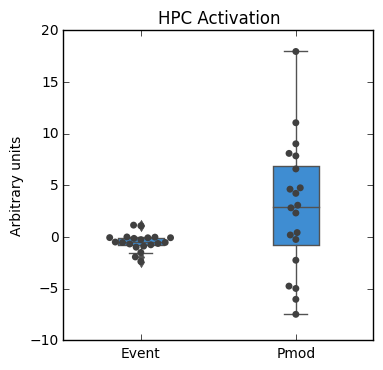

In [15]:
print 'PMOD mean:', np.mean(all_data_df['hp_all_pmod'])
print 'PMOD std:', np.std(all_data_df['hp_all_pmod'])
print ""
print 'EVENT mean:', np.mean(all_data_df['hp_all_event'])
print 'EVENT std:', np.std(all_data_df['hp_all_event'])
print ""
print 'T-test: Hippocampus PMOD vs. EVENT'
print stats.ttest_rel(all_data_df['hp_all_pmod'], all_data_df['hp_all_event'])
cohens_d = ((np.average(all_data_df['hp_all_pmod']) - np.average(all_data_df['hp_all_event'])) 
            / (sqrt((np.std(all_data_df['hp_all_pmod'], ddof = 1)) 
            ** 2 + np.std(all_data_df['hp_all_event'], ddof = 1) ** 2) / 2))
print "Cohen's d = ", cohens_d
N = 2
conditions = ['Event', 'Pmod']
hp_allsubjs = [all_data_df['hp_all_event'], 
               all_data_df['hp_all_pmod']]
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots(figsize = (4,4))
ax0 = sns.boxplot(data = hp_allsubjs, color = "#278fea", width = 0.3)
ax2 = sns.swarmplot(data = hp_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Arbitrary units")
ax.set_title("HPC Activation")
plt.savefig("/home/arenf001/cond_slope-HPC.jpg", dpi = 1080)
plt.show()

### Caudate Stats

In [9]:
#create Pandas dataframe to store correlations
caud_chart = {}
caud_chart['1_CA-event'] = all_data_df['caud_all_event'] 
caud_chart['2_CA-pmod'] = all_data_df['caud_all_pmod'] 
caud_chart_df = pd.DataFrame.from_dict(caud_chart)

In [10]:
caud_chart_df

,1_CA-event,2_CA-pmod
0,0.247692,1.857883
1,0.287764,2.833596
2,-0.496184,4.623130
3,0.544971,3.499846
4,0.723738,-2.417228
5,3.171613,-10.788618
6,1.357786,-6.323852
7,-0.119378,-4.681993
8,-0.073616,4.711865
9,-1.284655,19.008023


PMOD mean: -0.124169658124
PMOD std: 8.53202560499

EVENT mean: 0.598633957841
EVENT std: 1.17533208754

T-test: Caudate PMOD vs. EVENT
Ttest_relResult(statistic=-0.36024834499683106, pvalue=0.72263509537667847)
Cohen's d =  -0.163597956054


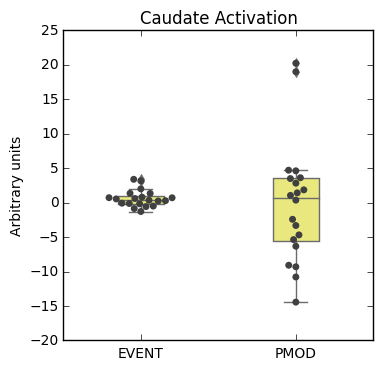

In [16]:
print 'PMOD mean:', np.mean(all_data_df['caud_all_pmod'])
print 'PMOD std:', np.std(all_data_df['caud_all_pmod'])
print ""
print 'EVENT mean:', np.mean(all_data_df['caud_all_event'])
print 'EVENT std:', np.std(all_data_df['caud_all_event'])
print ""
print 'T-test: Caudate PMOD vs. EVENT'
print stats.ttest_rel(all_data_df['caud_all_pmod'], all_data_df['caud_all_event'])
cohens_d = ((np.average(all_data_df['caud_all_pmod']) - np.average(all_data_df['caud_all_event'])) 
            / (sqrt((np.std(all_data_df['caud_all_pmod'], ddof = 1)) 
            ** 2 + np.std(all_data_df['caud_all_event'], ddof = 1) ** 2) / 2))
print "Cohen's d = ", cohens_d
N = 2
conditions = ['EVENT', 'PMOD']
caud_allsubjs = [all_data_df['caud_all_event'], 
                 all_data_df['caud_all_pmod']]
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots(figsize = (4,4))
ax0 = sns.boxplot(data = caud_allsubjs, color = "#f9f96d", width = 0.3)
ax2 = sns.swarmplot(data = caud_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Arbitrary units")
ax.set_title("Caudate Activation")
plt.savefig("/home/arenf001/cond_slope-CAUD.jpg", dpi = 1080)
plt.show()

### Putamen Stats

In [12]:
put_chart = {}
put_chart['1_PT-event'] = all_data_df['put_all_event'] 
put_chart['2_PT-pmod'] = all_data_df['put_all_pmod']  
put_chart_df = pd.DataFrame.from_dict(put_chart)

In [13]:
put_chart_df

,1_PT-event,2_PT-pmod
0,0.536632,-4.425897
1,0.763996,3.726510
2,-0.615533,9.022819
3,-0.523904,0.463892
4,-0.053692,-8.748922
5,0.315832,2.628148
6,0.540414,-6.962277
7,-0.761506,-2.431112
8,-2.061292,1.326364
9,-0.481981,5.183372


PMOD mean: 0.772782260925
PMOD std: 7.20402655957

EVENT mean: -0.0769412668888
EVENT std: 0.771849552245

T-test: Putamen PMOD vs. EVENT
Ttest_relResult(statistic=0.5006639591281008, pvalue=0.62235779694801618)
Cohen's d =  0.228620747742


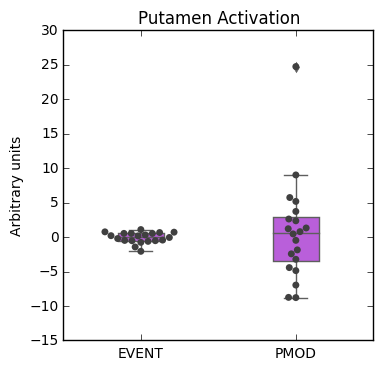

In [17]:
print 'PMOD mean:', np.mean(all_data_df['put_all_pmod'])
print 'PMOD std:', np.std(all_data_df['put_all_pmod'])
print ""
print 'EVENT mean:', np.mean(all_data_df['put_all_event'])
print 'EVENT std:', np.std(all_data_df['put_all_event'])
print ""
print 'T-test: Putamen PMOD vs. EVENT'
print stats.ttest_rel(all_data_df['put_all_pmod'], all_data_df['put_all_event'])
cohens_d = ((np.average(all_data_df['put_all_pmod']) - np.average(all_data_df['put_all_event'])) 
            / (sqrt((np.std(all_data_df['put_all_pmod'], ddof = 1)) 
            ** 2 + np.std(all_data_df['put_all_event'], ddof = 1) ** 2) / 2))
print "Cohen's d = ", cohens_d
N = 2
conditions = ['EVENT', 'PMOD']
put_allsubjs = [all_data_df['put_all_event'], 
                all_data_df['put_all_pmod']]
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots(figsize = (4,4))
ax0 = sns.boxplot(data = put_allsubjs, color = "#c34aef", width = 0.3)
ax2 = sns.swarmplot(data = put_allsubjs, color='.25')
ax.set_xticklabels(conditions)
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Arbitrary units")
ax.set_title("Putamen Activation")
plt.savefig("/home/arenf001/cond_slope-PUT.jpg", dpi = 1080)
plt.show()